In [1]:
import pandas as pd 
import numpy as np
import math
import tensorflow as tf
print(pd.__version__)

1.2.0


## Print Dependencies



Dependences are fundamental to record the computational environment.

In [2]:
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p pandas,keras,numpy,math,tensorflow,matplotlib,h5py

# date
print (" ")
%watermark -u -n -t -z

Python implementation: CPython
Python version       : 3.8.7
IPython version      : 7.18.1

pandas    : 1.2.0
keras     : 2.4.3
numpy     : 1.19.5
math      : unknown
tensorflow: 2.4.0
matplotlib: 3.3.3
h5py      : 2.10.0

Compiler    : Clang 12.0.0 (clang-1200.0.32.28)
OS          : Darwin
Release     : 20.2.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit

 
Last updated: Mon Jan 25 2021 15:03:35CET



## Load of the data

In [3]:
regen_data = False
# If we keep it as false, it's going to just load the data. If true it's going to regenerate the data again 

In [4]:
if regen_data:
    from process import load_generate_data
    from process import savedata
    regr_data, class_data = load_generate_data(0.1, 5)
    savedata(regr_data, "regression_data-2.csv")

In [5]:
if not regen_data:
    from process import loaddata
    regr_data = loaddata("regression_data-2.csv")

In [15]:
np.random.shuffle(regr_data)
y = regr_data[:,-3:]
x = regr_data[:,:6]

In [16]:
train_split = 0.75
train_limit = int(len(y)*train_split)
print("Training sample: {0} \nValuation sample: {1}".format(train_limit, len(y)-train_limit))

Training sample: 46524 
Valuation sample: 15508


In [17]:
x.shape

(62032, 6)

In [18]:
x_train = x[:train_limit]
x_val = x[train_limit:]

y_train = y[:train_limit]
y_val = y[train_limit:]

## Model Build

In [19]:
from keras.models import Sequential
from keras.layers.core import Dense
import keras.backend as K
from keras import optimizers
from keras import models
from keras import layers

In [20]:
def build_model() :
    model = models.Sequential()
    model.add (layers.Dense (6, activation = "sigmoid" , input_shape = x.shape))
    model.add(layers.Dropout(0.3))
    model.add (layers.Dense (8, activation = "relu"))
    model.add(layers.Dropout(0.3))
    model.add (layers.Dense (3))
    model.compile(optimizer = "rmsprop" , loss = "mse" , metrics =["mae"])
    return model

In [21]:
model = build_model()
history = model.fit ( x_train, y_train, epochs = 100, batch_size = 2032, validation_data = (x_val, y_val) )
model.save("regr.h5")

Epoch 1/100
23/23 [==============================] - 2s 42ms/step - loss: 0.1320 - mae: 0.2579 - val_loss: 0.0083 - val_mae: 0.0750
Epoch 2/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0710 - mae: 0.1820 - val_loss: 0.0021 - val_mae: 0.0374
Epoch 3/100
23/23 [==============================] - 0s 4ms/step - loss: 0.0444 - mae: 0.1402 - val_loss: 0.0031 - val_mae: 0.0460
Epoch 4/100
23/23 [==============================] - 0s 6ms/step - loss: 0.0294 - mae: 0.1144 - val_loss: 0.0040 - val_mae: 0.0516
Epoch 5/100
23/23 [==============================] - 0s 7ms/step - loss: 0.0191 - mae: 0.0937 - val_loss: 0.0030 - val_mae: 0.0444
Epoch 6/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0124 - mae: 0.0749 - val_loss: 0.0021 - val_mae: 0.0375
Epoch 7/100
23/23 [==============================] - 0s 6ms/step - loss: 0.0082 - mae: 0.0596 - val_loss: 0.0017 - val_mae: 0.0340
Epoch 8/100
23/23 [==============================] - 0s 4ms/step - loss: 0.0051 - 

23/23 [==============================] - 0s 4ms/step - loss: 0.0015 - mae: 0.0315 - val_loss: 0.0015 - val_mae: 0.0321
Epoch 56/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0015 - mae: 0.0317 - val_loss: 0.0015 - val_mae: 0.0321
Epoch 57/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0015 - mae: 0.0316 - val_loss: 0.0015 - val_mae: 0.0321
Epoch 58/100
23/23 [==============================] - 0s 4ms/step - loss: 0.0015 - mae: 0.0317 - val_loss: 0.0015 - val_mae: 0.0321
Epoch 59/100
23/23 [==============================] - 0s 4ms/step - loss: 0.0015 - mae: 0.0316 - val_loss: 0.0015 - val_mae: 0.0321
Epoch 60/100
23/23 [==============================] - 0s 4ms/step - loss: 0.0015 - mae: 0.0316 - val_loss: 0.0015 - val_mae: 0.0321
Epoch 61/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0015 - mae: 0.0316 - val_loss: 0.0015 - val_mae: 0.0321
Epoch 62/100
23/23 [==============================] - 0s 6ms/step - loss: 0.0015 - mae: 0

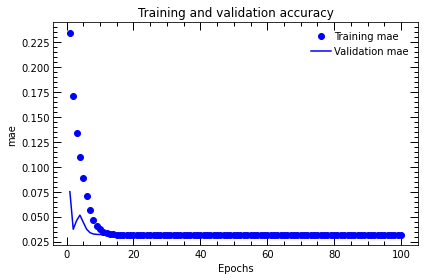

In [22]:
import matplotlib.pyplot as plt

mae = history.history['mae']
val_mae = history.history['val_mae']

epochs = range(1, len(mae) + 1)

plt.plot(epochs, mae, 'bo', label='Training mae')
plt.plot(epochs, val_mae, 'b', label='Validation mae')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()

plt.show()

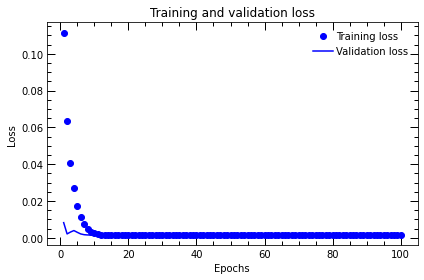

In [24]:
plt.clf()   # clear figure

loss = history.history['loss']
val_loss = history.history['val_loss']



plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## !! 
The dropout 0.2 seems to work better

In [25]:
def build_model() :
    model = models.Sequential()
    model.add (layers.Dense (6, activation = "sigmoid" , input_shape = x.shape))
    model.add(layers.Dropout(0.2))
    model.add (layers.Dense (6, activation = "relu"))
    model.add(layers.Dropout(0.2))
    model.add (layers.Dense (6, activation = "relu"))
    model.add(layers.Dropout(0.2))
    model.add (layers.Dense (3))
    model.compile(optimizer = "rmsprop" , loss = "mse" , metrics =["mae"])
    return model

In [26]:
model = build_model ()
history = model.fit ( x_train, y_train, epochs = 100, batch_size = 2032, validation_data = (x_val, y_val) )
model.save("regr.h5")

Epoch 1/100
23/23 [==============================] - 1s 12ms/step - loss: 1.0334 - mae: 0.8614 - val_loss: 0.3207 - val_mae: 0.5648
Epoch 2/100
23/23 [==============================] - 0s 6ms/step - loss: 0.5131 - mae: 0.5974 - val_loss: 0.1334 - val_mae: 0.3628
Epoch 3/100
23/23 [==============================] - 0s 5ms/step - loss: 0.2745 - mae: 0.4254 - val_loss: 0.0401 - val_mae: 0.1952
Epoch 4/100
23/23 [==============================] - 0s 5ms/step - loss: 0.1369 - mae: 0.2904 - val_loss: 0.0063 - val_mae: 0.0665
Epoch 5/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0669 - mae: 0.1987 - val_loss: 0.0043 - val_mae: 0.0544
Epoch 6/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0353 - mae: 0.1404 - val_loss: 0.0124 - val_mae: 0.1022
Epoch 7/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0216 - mae: 0.1138 - val_loss: 0.0101 - val_mae: 0.0919
Epoch 8/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0135 - 

23/23 [==============================] - 0s 5ms/step - loss: 0.0015 - mae: 0.0320 - val_loss: 0.0015 - val_mae: 0.0321
Epoch 56/100
23/23 [==============================] - 0s 6ms/step - loss: 0.0015 - mae: 0.0319 - val_loss: 0.0015 - val_mae: 0.0321
Epoch 57/100
23/23 [==============================] - 0s 7ms/step - loss: 0.0015 - mae: 0.0319 - val_loss: 0.0015 - val_mae: 0.0321
Epoch 58/100
23/23 [==============================] - 0s 6ms/step - loss: 0.0015 - mae: 0.0319 - val_loss: 0.0015 - val_mae: 0.0321
Epoch 59/100
23/23 [==============================] - 0s 7ms/step - loss: 0.0015 - mae: 0.0320 - val_loss: 0.0015 - val_mae: 0.0321
Epoch 60/100
23/23 [==============================] - 0s 6ms/step - loss: 0.0015 - mae: 0.0320 - val_loss: 0.0015 - val_mae: 0.0321
Epoch 61/100
23/23 [==============================] - 0s 6ms/step - loss: 0.0015 - mae: 0.0320 - val_loss: 0.0015 - val_mae: 0.0321
Epoch 62/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0015 - mae: 0

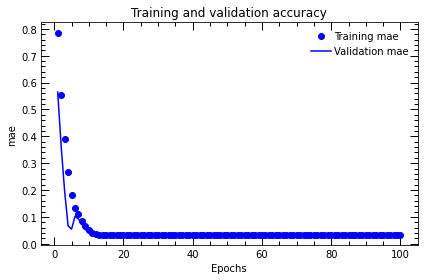

In [27]:
import matplotlib.pyplot as plt

mae = history.history['mae']
val_mae = history.history['val_mae']

epochs = range(1, len(mae) + 1)

plt.plot(epochs, mae, 'bo', label='Training mae')
plt.plot(epochs, val_mae, 'b', label='Validation mae')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()

plt.show()